In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from env import get_db_url

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, \
    classification_report, precision_score, recall_score

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, f_regression, RFE

import acquire_r, wrangle

In [2]:
df = acquire_r.get_data_from_sql()
df = wrangle.wrangle_telco(df)
df['monthly_charges_bins'] = pd.cut(df.monthly_charges, 
                [0,20,40,60,80,100,120],labels=[0,1,2,3,4,5])
df['number_of_lines'] = df.multiple_lines.replace({'Yes':2, 'No':1,\
                                        'No phone service':0})

In [3]:
df1_0 = df[['streaming_tv','senior_citizen','partner','dependents', 
         'online_security','online_backup','device_protection', 
         'tech_support','streaming_movies', 
         'paperless_billing',]][df.churn==0]
df1_1 = df[['streaming_tv','senior_citizen','partner','dependents', 
         'online_security','online_backup','device_protection', 
         'tech_support','streaming_movies', 
         'paperless_billing',]][df.churn==1]
df2_0 = df[['number_of_lines','tenure_years',
         'monthly_charges_bins','payment_type_id',
         'internet_service_type_id','contract_type_id',]][df.churn==0]
df2_1 = df[['number_of_lines','tenure_years',
         'monthly_charges_bins','payment_type_id',
         'internet_service_type_id','contract_type_id',]][df.churn==1]

In [4]:
df1_0 = pd.DataFrame(df1_0.mean()).T
df1_1 = pd.DataFrame(df1_1.mean()).T
df2_0 = pd.DataFrame(df2_0.mean()).T
df2_1 = pd.DataFrame(df2_1.mean()).T

In [5]:
df1_0

,streaming_tv,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_movies,paperless_billing
0,0.910905,0.128995,0.5276,0.343405,0.878172,0.913422,0.907806,0.880108,0.915553,0.536122


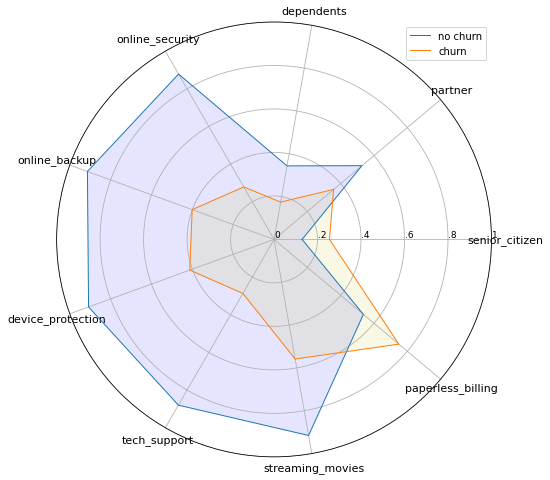

In [6]:
plt.rc('figure',figsize=(13,8))

# number of variables
categories1=list(df1_0)[1:]
N1 = len(categories1)

categories2=list(df1_1)[1:]
N2 = len(categories2)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
# values=df.loc[0].drop('group').values.flatten().tolist()
values1 = df1_0.loc[0].drop('streaming_tv').values.flatten().tolist()
values1 += values1[:1]

values2 = df1_1.loc[0].drop('streaming_tv').values.flatten().tolist()
values2 += values2[:1]

# What will be the angle of each axis in the plot? 
# (we divide the plot / number of variable)
angles1 = [n / float(N1) * 2 * pi for n in range(N1)]
angles1 += angles1[:1]

angles2 = [n / float(N2) * 2 * pi for n in range(N2)]
angles2 += angles2[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles1[:-1], categories1, color='black', size=11)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,.2,.4,.6,.8,1], ['0','.2','.4','.6','.8','1'], 
           color="black", size=9)
plt.ylim(0,1)

# Plot data
ax.plot(angles1, values1, linewidth=1, 
        linestyle='solid', label='no churn')
 
# Fill area
ax.fill(angles1, values1, 'b', alpha=0.1)

ax.plot(angles2, values2, linewidth=1, 
        linestyle='solid', label='churn')
 
# Fill area
ax.fill(angles2, values2, 'y', alpha=0.1)
plt.legend()

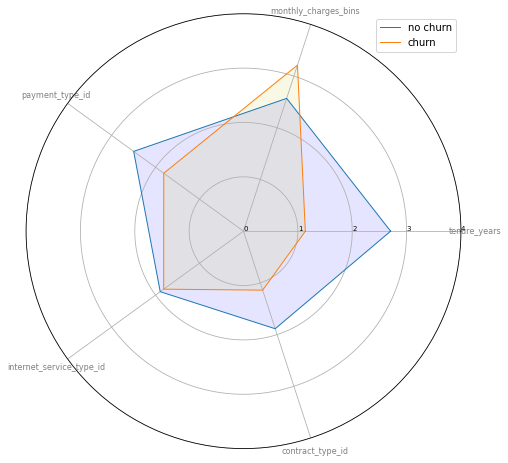

In [7]:
# number of variable
categories1=list(df2_0)[1:]
N1 = len(categories1)

categories2=list(df2_1)[1:]
N2 = len(categories2)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
# values=df.loc[0].drop('group').values.flatten().tolist()
values1 = df2_0.loc[0].drop('number_of_lines').values.flatten().tolist()
values1 += values1[:1]

values2 = df2_1.loc[0].drop('number_of_lines').values.flatten().tolist()
values2 += values2[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles1 = [n / float(N1) * 2 * pi for n in range(N1)]
angles1 += angles1[:1]

angles2 = [n / float(N2) * 2 * pi for n in range(N2)]
angles2 += angles2[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles1[:-1], categories1, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,1,2,3,4,], ['0','1','2','3','4',], 
           color="black", size=7)
plt.ylim(0,4)
plt.rc('figure', figsize=(11,6))
# Plot data
ax.plot(angles1, values1, linewidth=1, linestyle='solid', label='no churn')
 
# Fill area
ax.fill(angles1, values1, 'b', alpha=0.1)

ax.plot(angles2, values2, linewidth=1, linestyle='solid', label='churn')
 
# Fill area
ax.fill(angles2, values2, 'y', alpha=0.1)
plt.legend()